## 1ST FOLLOWING the 1st Video from Karpathy NN Video

<a href="https://www.youtube.com/watch?v=PaCmpygFfXo&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=2" target="_blank">1st video of the series</a>

The `open` comes from the standard python library.
The `read` method is called on the file object returned by open.
The `splitlines` method is called on the string returned by read. It splits the string into a list of lines, breaking at line boundaries. By default, the line breaks are not included in the resulting list.

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
# Doing some simple analysis of the names list 
print(f"Minimum: {min(len(word) for word in words)}")
print(f"Maximum: {max(len(word) for word in words)}")
print(f"Length Dataset: {len(words)}")

Minimum: 2
Maximum: 15
Length Dataset: 32033


The method `zip` returns an iterator of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables. The iterator stops when the shortest input iterable is exhausted. So for example by parrying the 1st 4 words: 

In [4]:
for w in words[:4]:
    print(f"{w}\n")
    for let1, let2 in zip(w, w[1:]):
        print(let1, let2)

emma

e m
m m
m a
olivia

o l
l i
i v
v i
i a
ava

a v
v a
isabella

i s
s a
a b
b e
e l
l l
l a


Large Language Models to process specific tasks like an end of a sentence and the beginning of a sentence, special tokens usually like `<SOS>` and `<EOS>`, which stand for Start of Sentence and End of Sentence.

In [5]:
for w in words[:4]:
    parola = ['<S>'] + list(w) + ['<E>']
    for let1, let2 in zip(parola, parola[1:]):
        print(let1, let2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>
<S> i
i s
s a
a b
b e
e l
l l
l a
a <E>


IN a bigram, which is a dataset which considers only 2 words or characters at a time, how can we understand which will be the next character or describe a probability distribution of the next character? WE can first star using the amount of times a character appears after another character. So let's count them: 

In [8]:
b = {} # initialize an empty dictionary
for w in words:   # use words[:10] to test onlt the first 10 words
    parola = ['<S>'] + list(w) + ['<E>']
    for let1, let2 in zip(parola, parola[1:]):
        bigram = (let1, let2) # since they are 2 tokens
        b[bigram] = b.get(bigram, 0) + 1  # this will add up all the bigrams
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [10]:
sorted(b.items(), key=lambda x: x[1], reverse=False)  # sorting the dictionary by the values, the 1st element of the tuple

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

It is convienite to store this kind of information in a 2d array, and not a dictionary. Can you nummpy, but torch.tensor are better and can handle more complex operations. 

In [40]:
import torch
N = torch.zeros(28, 28, dtype=torch.int16)  # 28 is the number of letters in the alphabet

In [16]:
chars = sorted(list(set(''.join(words))))  # this will give us the unique characters in the words list
# set() is used to remove duplicates, from words, which is a list of strings. Adding everything together with a join, into a listen, and then sorting it. Now creating the mapping 
s_to_i = {s: i for i, s in enumerate(chars)}  # this will give us the mapping from the character to the index, so to each character we assign an index
s_to_i['<S>'] = 26  # adding the start and end tokens
s_to_i['<E>'] = 27
s_to_i

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [41]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        i1, i2 = s_to_i[ch1], s_to_i[ch2]
        N[i1, i2] += 1

In [22]:
i_to_s = {i: s for s, i in s_to_i.items()}  # this will give us the mapping from the index to the character

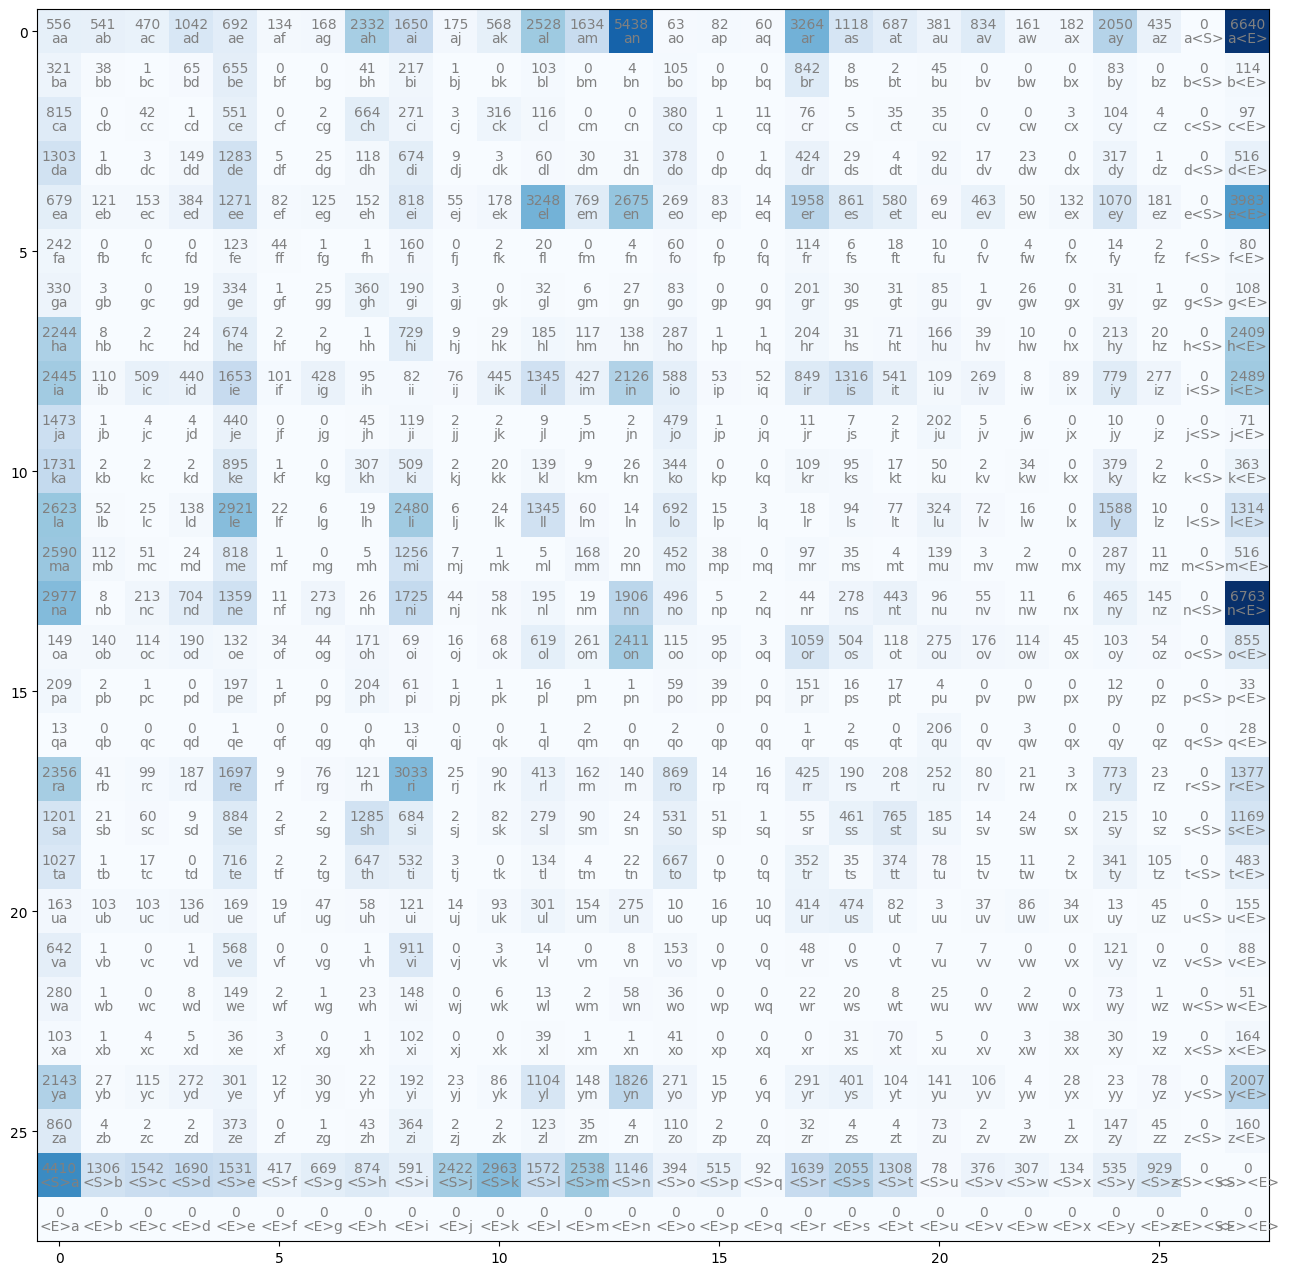

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

for i in range(28):
    for j in range(28):
        chars = i_to_s[i] + i_to_s[j]  # this will give us the index of the bigram
        plt.text(j, i, chars, ha='center', va='top', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='bottom', color='gray')
